<a href="https://colab.research.google.com/github/weathon/dating-app-pub/blob/main/Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/weathon/dating-app-pub/main/res/data.csv

--2023-02-16 23:32:46--  https://raw.githubusercontent.com/weathon/dating-app-pub/main/res/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117447 (115K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>] 114.69K  --.-KB/s    in 0.01s   

2023-02-16 23:32:47 (8.81 MB/s) - ‘data.csv’ saved [117447/117447]



In [2]:
import pylab
import numpy as np
import pandas as pd
import scipy.stats
df = pd.read_csv("data.csv")

In [3]:
def get_options(name):
    return sorted(list(df[name].drop_duplicates()))

def filter(**args):
    res = pd.DataFrame(df)
    for i in args.keys():
        res = res[res[i]==args[i]]
    return res

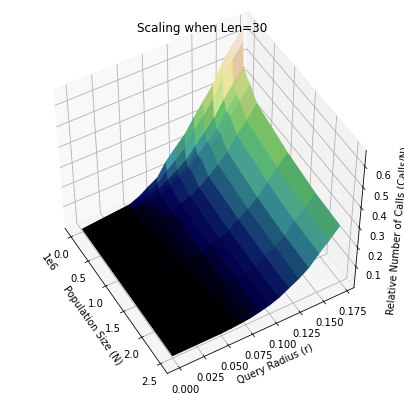

In [6]:
pylab.rcParams["figure.figsize"] = (7,7)
fig, ax = pylab.subplots(subplot_kw={"projection": "3d"})
# pylab.subplots_adjust(right=0.3)
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_adjust.html

LENi = -1
p = np.zeros(shape=(len(get_options("N")),len(get_options("r"))))
for i in range(len(get_options("N"))):
  for j in range(len(get_options("r"))):
    p[i][j]=(filter(N=get_options("N")[i], r=get_options("r")[j], len=get_options("len")[LENi])["Call Counts"]/get_options("N")[i]).mean()

X, Y = np.meshgrid(get_options("r"),get_options("N"))
from matplotlib.colors import LightSource
# https://matplotlib.org/3.1.0/gallery/mplot3d/custom_shaded_3d_surface.html#sphx-glr-gallery-mplot3d-custom-shaded-3d-surface-py
ls = LightSource(270, 45)
rgb = ls.shade(p, cmap=pylab.cm.gist_earth, vert_exag=0.1, blend_mode='soft')
ax.plot_surface(Y,X,p, cmap=pylab.cm.coolwarm, facecolors=rgb)
ax.set_xlabel("Population Size (N)")
ax.set_ylabel("Query Radius (r)")
ax.set_zlabel("Relative Number of Calls (Calls/N)")
ax.set_title(f"Scaling when Len={get_options('len')[LENi]}")
ax.view_init(50, -30)
# https://www.geeksforgeeks.org/how-to-change-angle-of-3d-plot-in-python/ 
# https://matplotlib.org/stable/gallery/mplot3d/surface3d.html

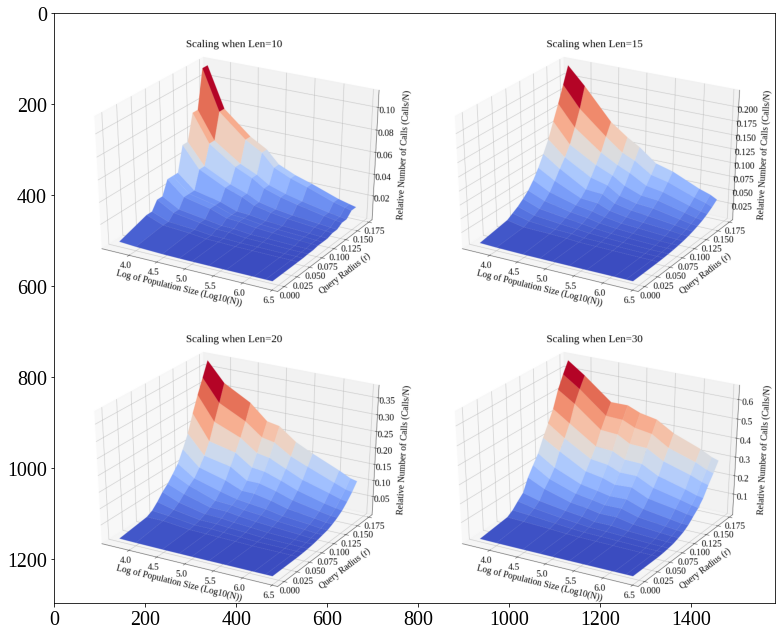

In [7]:
pylab.rcParams["figure.figsize"] = (11,9)
# pylab.style.use("ggplot") # must be here
# pylab.style.use("default") # must be here. #it is not cutted anymore, ohhhhhhhh size need to be after style

pylab.rcParams.update({'font.size': 20})
pylab.rcParams["font.family"] = "Liberation Serif" # run here otherwise wont work

fig, ax = pylab.subplots(subplot_kw={"projection": "3d"})
pylab.subplots_adjust(right=1, top=0.91, left=0,bottom=0)
# these are fractions https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html
# https://stackoverflow.com/a/4066599


for LENi in range(len(get_options("len"))):
  p = np.zeros(shape=(len(get_options("N")),len(get_options("r"))))
  for i in range(len(get_options("N"))):
    for j in range(len(get_options("r"))):
      p[i][j]=(filter(N=get_options("N")[i], r=get_options("r")[j], len=get_options("len")[LENi])["Call Counts"]/get_options("N")[i]).mean()
  Y = np.log10(get_options("N"))
  X, Y = np.meshgrid(get_options("r"),Y)

  ax.plot_surface(Y,X,p, cmap=pylab.cm.coolwarm)
  ax.set_xlabel("\nLog of Population Size (Log10(N))")
  ax.set_ylabel("\n\nQuery Radius (r)")
  ax.set_zlabel("\n\nRelative Number of Calls (Calls/N)")
  ax.set_title(f"Scaling when Len={get_options('len')[LENi]}\n")
  pylab.savefig(f"scale{get_options('len')[LENi]}.png")
  pylab.cla()
pylab.clf()


from PIL import Image
images = []
for i in [10,15,20,30]:
  img = Image.open(f"scale{i}.png")
  images.append(np.array(img))


new_pic = np.zeros((images[0].shape[0]*2,images[0].shape[1]*2,4),"uint8")
new_pic[0:images[0].shape[0],0:images[0].shape[1]]=images[0]
new_pic[images[0].shape[0]:images[0].shape[0]*2,0:images[0].shape[1]]=images[2]
new_pic[0:images[0].shape[0],images[0].shape[1]:images[0].shape[1]*2]=images[1]
new_pic[images[0].shape[0]:images[0].shape[0]*2,images[0].shape[1]:images[0].shape[1]*2]=images[3]
pylab.imshow(new_pic)
# Image.save(new_pic, "combine.png")
Image.fromarray(new_pic).save("combine.png")


In [ ]:
# # Test, no need to be mesh
# pylab.rcParams["figure.figsize"] = (5,5)
# # pylab.style.use("ggplot") # must be here
# # pylab.style.use("default") # must be here. #it is not cutted anymore, ohhhhhhhh size need to be after style

# pylab.rcParams.update({'font.size': 20})
# pylab.rcParams["font.family"] = "Liberation Serif" # run here otherwise wont work

# fig, ax = pylab.subplots(subplot_kw={"projection": "3d"})
# pylab.subplots_adjust(right=1, top=0.91, left=0,bottom=0)
# # these are fractions https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html
# # https://stackoverflow.com/a/4066599

# X = np.array([[1,200],[2,5]])
# Y = np.array([[1,2],[3,5]])
# Z = np.array([[1,2],[2,5]])


# # ax.plot_surface(Y,X,Z, cmap=pylab.cm.coolwarm)
# ax.plot_trisurface([0,1,2],[1,2,3],[8,9,10])
# # ax.set_xlabel("\nLog of Population Size (Log10(N))")
# # ax.set_ylabel("\n\nQuery Radius (r)")
# # ax.set_zlabel("\n\nRelative Number of Calls (Calls/N)")
# # ax.set_title(f"Scaling when Len={get_options('len')[LENi]}\n")
# # pylab.savefig(f"scale{get_options('len')[LENi]}.png")


In [ ]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = pylab.figure()
# ax = Axes3D(fig)
# surf = ax.plot_trisurf([1,2,3],[2,3,4],[5,5,5], linewidth=0.1)

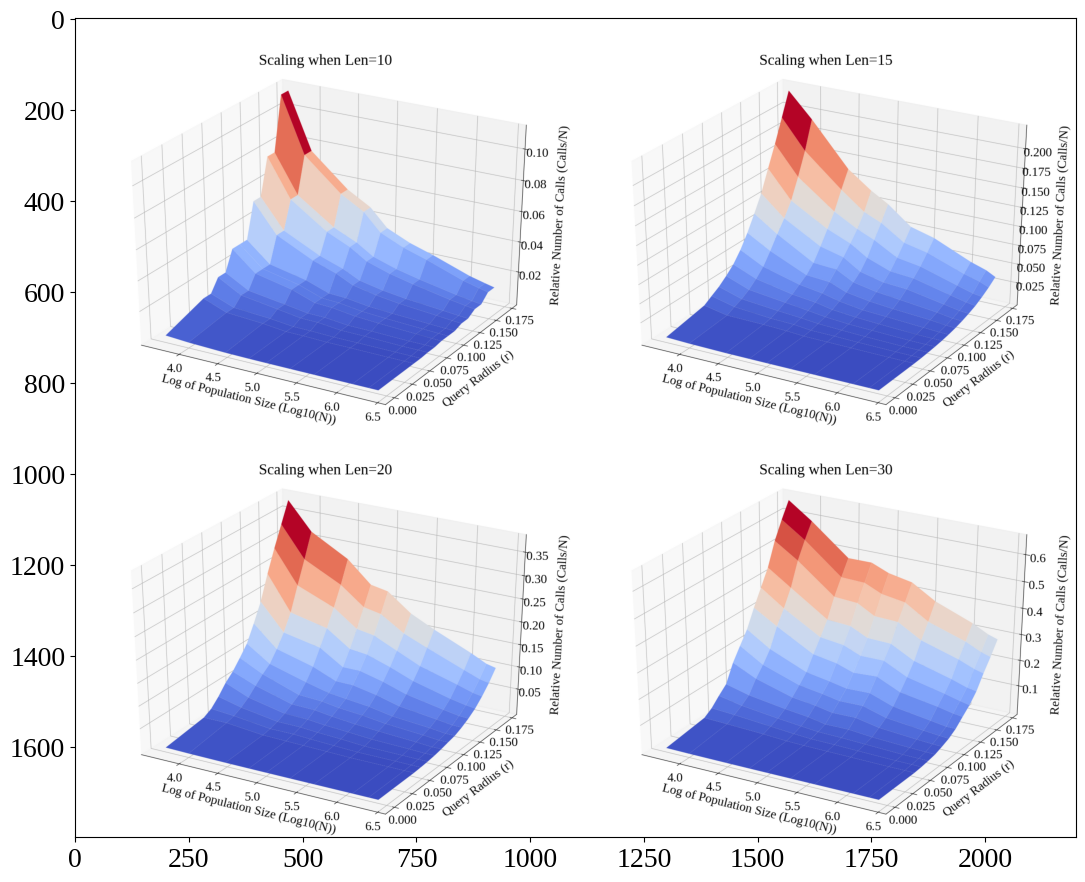

In [ ]:
pylab.rcParams["figure.figsize"] = (11,9)
# pylab.style.use("ggplot") # must be here
# pylab.style.use("default") # must be here. #it is not cutted anymore, ohhhhhhhh size need to be after style

pylab.rcParams.update({'font.size': 20})
pylab.rcParams["font.family"] = "Liberation Serif" # run here otherwise wont work

fig, ax = pylab.subplots(subplot_kw={"projection": "3d"})
pylab.subplots_adjust(right=1, top=0.91, left=0,bottom=0)
# these are fractions https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html
# https://stackoverflow.com/a/4066599


for LENi in range(len(get_options("len"))):
  p = np.zeros(shape=(len(get_options("N")),len(get_options("r"))))
  for i in range(len(get_options("N"))):
    for j in range(len(get_options("r"))):
      p[i][j]=(filter(N=get_options("N")[i], r=get_options("r")[j], len=get_options("len")[LENi])["Call Counts"]/get_options("N")[i]).mean()
  Y = np.log10(get_options("N"))
  X, Y = np.meshgrid(get_options("r"),Y)

  ax.plot_surface(Y,X,p, cmap=pylab.cm.coolwarm)
  ax.set_xlabel("\nLog of Population Size (Log10(N))")
  ax.set_ylabel("\n\nQuery Radius (r)")
  ax.set_zlabel("\n\nRelative Number of Calls (Calls/N)")
  ax.set_title(f"Scaling when Len={get_options('len')[LENi]}\n")
  pylab.savefig(f"scale{get_options('len')[LENi]}.png")
  pylab.cla()
pylab.clf()


from PIL import Image
images = []
for i in [10,15,20,30]:
  img = Image.open(f"scale{i}.png")
  images.append(np.array(img))


new_pic = np.zeros((images[0].shape[0]*2,images[0].shape[1]*2,4),"uint8")
new_pic[0:images[0].shape[0],0:images[0].shape[1]]=images[0]
new_pic[images[0].shape[0]:images[0].shape[0]*2,0:images[0].shape[1]]=images[2]
new_pic[0:images[0].shape[0],images[0].shape[1]:images[0].shape[1]*2]=images[1]
new_pic[images[0].shape[0]:images[0].shape[0]*2,images[0].shape[1]:images[0].shape[1]*2]=images[3]
pylab.imshow(new_pic)
# Image.save(new_pic, "combine.png")
Image.fromarray(new_pic).save("combine.png")


In [ ]:
images[0].shape

(900, 1100, 4)

In [ ]:
!rm *.png *.svg

rm: cannot remove '*.svg': No such file or directory


Text(0.5, 0.92, 'Scaling when Len=15')

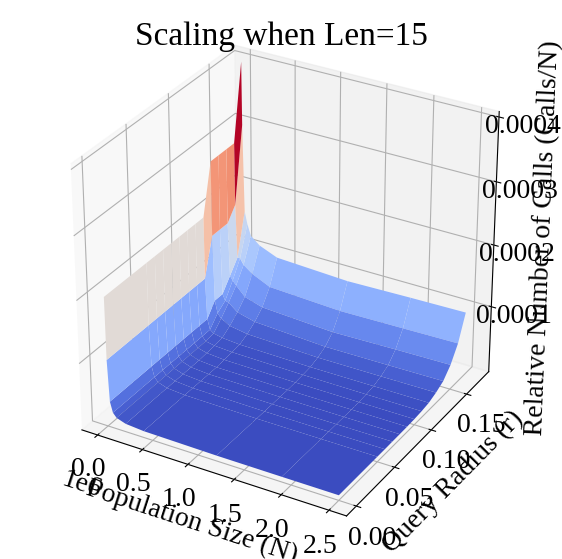

In [ ]:
pylab.rcParams["figure.figsize"] = (7,7)
fig, ax = pylab.subplots(subplot_kw={"projection": "3d"})
# pylab.subplots_adjust(right=0.3)
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_adjust.html

LENi = 1
p = np.zeros(shape=(len(get_options("N")),len(get_options("r"))))
for i in range(len(get_options("N"))):
  for j in range(len(get_options("r"))):
    p[i][j]=(filter(N=get_options("N")[i], r=get_options("r")[j], len=get_options("len")[LENi])["nFound"]).mean()/get_options("N")[i]

X, Y = np.meshgrid(get_options("r"),get_options("N"))
ax.plot_surface(Y,X,p, cmap=pylab.cm.coolwarm)
ax.set_xlabel("Population Size (N)")
ax.set_ylabel("Query Radius (r)")
ax.set_zlabel("Relative Number of Calls (Calls/N)")
ax.set_title(f"Scaling when Len={get_options('len')[LENi]}")
# ax.view_init(30, 290)
# https://www.geeksforgeeks.org/how-to-change-angle-of-3d-plot-in-python/ 
# https://matplotlib.org/stable/gallery/mplot3d/surface3d.html

In [ ]:
# f = filter(r=0.15, N=2.5e6,) naoziyun
f = filter(len=15, N=2.5e6)
pylab.rcParams["figure.figsize"] = (7,7)
pylab.style.use("ggplot")
pylab.scatter(f["nFound"],f["Time"])
pylab.xscale("log")

TypeError: ignored

why nFound/N>0??? =25 
not /i /options[i]

In [ ]:
df["nFound"].drop_duplicates() 

In [ ]:
np.meshgrid([1,2,3],[4,5,6])

In [ ]:
pylab.imshow(p) # last time it seems random because forgot to sort options

In [ ]:
pylab.rcParams["figure.figsize"] = (10,7)
fig, ax = pylab.subplots(subplot_kw={"projection": "3d"})
X, Y = np.meshgrid(get_options("r"),get_options("N"))
fig.colorbar(ax.plot_surface(Y,X,p, cmap=pylab.cm.coolwarm))
# https://matplotlib.org/stable/gallery/mplot3d/surface3d.html

In [ ]:
frame1 = filter(len=10)["Time"]/filter(len=10)["Call Counts"]
frame2 = filter(len=30)["Time"]/filter(len=30)["Call Counts"]
scipy.stats.ttest_rel(frame1,frame2) 

In [ ]:
pylab.plot([i if i<0.03 else 0.03 for i in frame1])

In [ ]:
pylab.plot(filter(len=10)["Call Counts"]/filter(len=10)["Time"])
pylab.plot(filter(len=30)["Call Counts"]/filter(len=30)["Time"])
pylab.plot(filter(len=20)["Call Counts"]/filter(len=20)["Time"])
pylab.plot(filter(len=15)["Call Counts"]/filter(len=15)["Time"])

In [ ]:
f = filter() # lengniao surfacechart   N, r, z: call %
pylab.scatter(f["N"],f["Call Counts"]/f["N"])
pylab.title("")
pylab.xlabel("Query ID")
pylab.ylabel("Call Counts%")

<function scipy.optimize.minpack.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)>

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


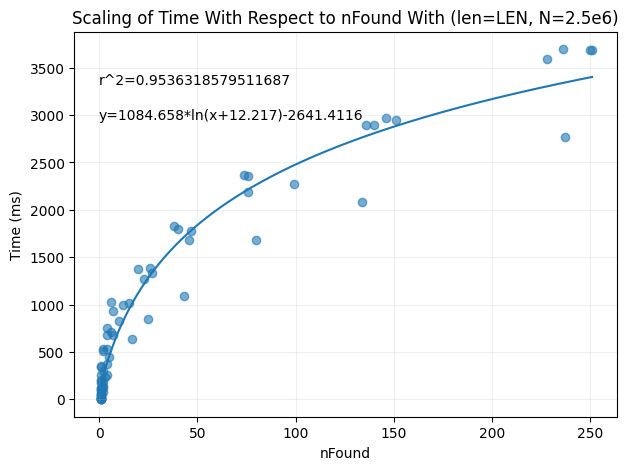

In [77]:
def fun(x, a, b, c):
  return b*np.log(x+a)+c

pylab.style.use("default")
pylab.rcParams["figure.figsize"] = (7,5)
LEN = 15
f = filter(len=LEN, N=2500000)
pylab.scatter(f["nFound"],f["Time"], alpha=0.6)
pylab.grid(alpha=0.2)

from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
popt, pcov = curve_fit(fun, f["nFound"],f["Time"])
y_pred = fun(f["nFound"], *popt)
r2= r2_score(f["Time"], y_pred)
Xs = np.arange(0,max(f["nFound"]),.1)
pylab.plot(Xs, fun(Xs, *popt))
# https://stackoverflow.com/questions/19189362/getting-the-r-squared-value-using-curve-fit


pylab.text(0, max(f["Time"])*0.9, f"r^2={round(r2,45)}")
popt = [round(i, 4) for i in popt]
pylab.text(0, max(f["Time"])*0.8, f"y={popt[1]}*ln(x+{popt[0]}){popt[2]}")
pylab.title("Scaling of Time With Respect to nFound With (len=LEN, N=2.5e6)")
pylab.xlabel("nFound")
pylab.ylabel("Time (ms)")

pylab.savefig(f'fig2.{LEN}.png', dpi=500)

In [67]:
f["nFound"]

1610    1
1611    1
1612    1
1613    1
1614    1
       ..
1675    1
1676    1
1677    1
1678    1
1679    1
Name: nFound, Length: 70, dtype: int64

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


RuntimeError: ignored

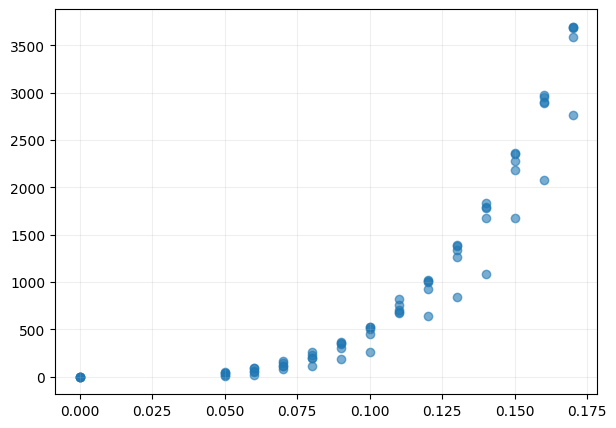

In [60]:
def fun(x, a, b, c):
  return b*np.log(x+a)+c

pylab.style.use("default")
pylab.rcParams["figure.figsize"] = (7,5)

f = filter(len=15, N=2500000)
pylab.scatter(f["r"],f["Time"], alpha=0.6)
pylab.grid(alpha=0.2)

from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
popt, pcov = curve_fit(fun, f["r"],f["Time"])
y_pred = fun(f["r"], *popt)
r2= r2_score(f["Time"], y_pred)
Xs = np.arange(0,250)
pylab.plot(Xs, fun(Xs, *popt))


pylab.text(0, 3520, f"r^2={round(r2,45)}")
popt = [round(i, 4) for i in popt]
pylab.text(0, 3300, f"y={popt[1]}*ln(x+{popt[0]}){popt[2]}")
pylab.title("Scaling of Time With Respect to r")
pylab.xlabel("r")
pylab.ylabel("Time (ms)")

pylab.savefig('fig2.png', dpi=500)

In [78]:
!zip fig2.zip fig2*

  adding: fig2.10.png (deflated 14%)
  adding: fig2.15.png (deflated 14%)
  adding: fig2.20.png (deflated 15%)
  adding: fig2.30.png (deflated 16%)
  adding: fig2.png (deflated 14%)


In [73]:
f = filter(len=30)
(f["nFound"]>1).any()

False